# <font size="32">Jak jednoręki bandyta i  „kółko i krzyżyk” </font>
# <font size="32">Mają zastosowanie w biznesie ? </font>


<br>
<br>

---
---

<br>

# Tematy na dziś:


- ### Testy A/B
- ### Dlaczego liczymy poziom __*istotności statystycznej*__
- ### Moja checklista do testów A/B  
- ### Gra w kółko i krzyżyk
- ### Q-Learning i wzór Bellmana
- ### Problem wielorękiego bandyty i *"Bandit Algorithms"*
- ### Wyżarzanie
<br>


---
---


# Testy A/B

<br>


![](img\jeff.jpg)
<br>
---




## Za optimizely:

### __*A/B testing*__ (also known as split testing or bucket testing) is a method of __*comparing two versions*__ of a webpage or app against each other to determine which one performs __*better*__.


### Co to znaczy __*better*__
- Bounce rate
- Conversion
- Click-Through Rate
- Etc. 
<br>

---
<br>

![](img\danger.png)


http://drewconway.com/zia/2013/3/26/the-data-science-venn-diagram
<br>
---

# <font color='red'>__*DANGER ZONE 1*__</font>


### __*better*__ zakłada, że jedno jest lepsze od drugiego.

### A tak naprawdę są 3 możliwe odpowiedzi:
- #### __*A*__ jest lepsze od __*B*__
- #### __*B*__ jest lepsze od __*A*__
- #### Wybór wersji __*A*__ czy __*B*__ __NIE MA WPŁYWU NA WYNIKI__

---

# Dlatego liczymy poziom __*istotności statystycznej*__

## $H_0$ - hipoteza zerowa - oba zbiory mają tą samą średnią

### `scipy.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', alternative='two-sided')[source]`
### Calculate the T-test for the means of two independent samples of scores.

#### This is a two-sided test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.


In [26]:
from collections import Counter
import numpy as np
from scipy import stats as st
import random

N=1000

a = random.choices([0, 1],  weights=[980, 20], k=N)
print("A :", Counter(a))
b = random.choices([0, 1],  weights=[980, 20], k=N)
print("B :", Counter(b))

t, p = st.ttest_ind(a,b)
print(f't={t} p={p}')
print()

if p>=0.05:
    print("Nie można odrzucić hipotezy zerowej, że zbiory mają tą samą średnią")
else:
    print("Należy odrzucić hipotezę zerową, że zbiory mają tą samą średnią")

A : Counter({0: 978, 1: 22})
B : Counter({0: 984, 1: 16})
t=0.982454778249028 p=0.3259947997943208

Nie można odrzucić hipotezy zerowej, że zbiory mają tą samą średnią


In [27]:
import numpy as np
from scipy import stats as st
import random

N=1000

a = random.choices([0, 1],  weights=[980, 20], k=N)
print("A :", Counter(a))
b = random.choices([0, 1],  weights=[975, 25], k=N)
print("B :", Counter(b))

t, p = st.ttest_ind(a,b)
print(f't={t} p={p}')
print()

if p>=0.05:
    print("Nie można odrzucić hipotezy zerowej, że zbiory mają tą samą średnią")
else:
    print("Należy odrzucić hipotezę zerową, że zbiory mają tą samą średnią")

A : Counter({0: 982, 1: 18})
B : Counter({0: 973, 1: 27})
t=-1.3569399745802935 p=0.174953560223698

Nie można odrzucić hipotezy zerowej, że zbiory mają tą samą średnią


In [28]:
import numpy as np
from scipy import stats as st
import random

N=10000

a = random.choices([0, 1],  weights=[980, 20], k=N)
print("A :", Counter(a))
b = random.choices([0, 1],  weights=[975, 25], k=N)
print("B :", Counter(b))

t, p = st.ttest_ind(a,b)
print(f't={t} p={p}')
print()

if p>=0.05:
    print("Nie można odrzucić hipotezy zerowej, że zbiory mają tą samą średnią")
else:
    print("Należy odrzucić hipotezę zerową, że zbiory mają tą samą średnią")

A : Counter({0: 9804, 1: 196})
B : Counter({0: 9750, 1: 250})
t=-2.586273351924915 p=0.009708994371041816

Należy odrzucić hipotezę zerową, że zbiory mają tą samą średnią


<Figure size 432x288 with 0 Axes>

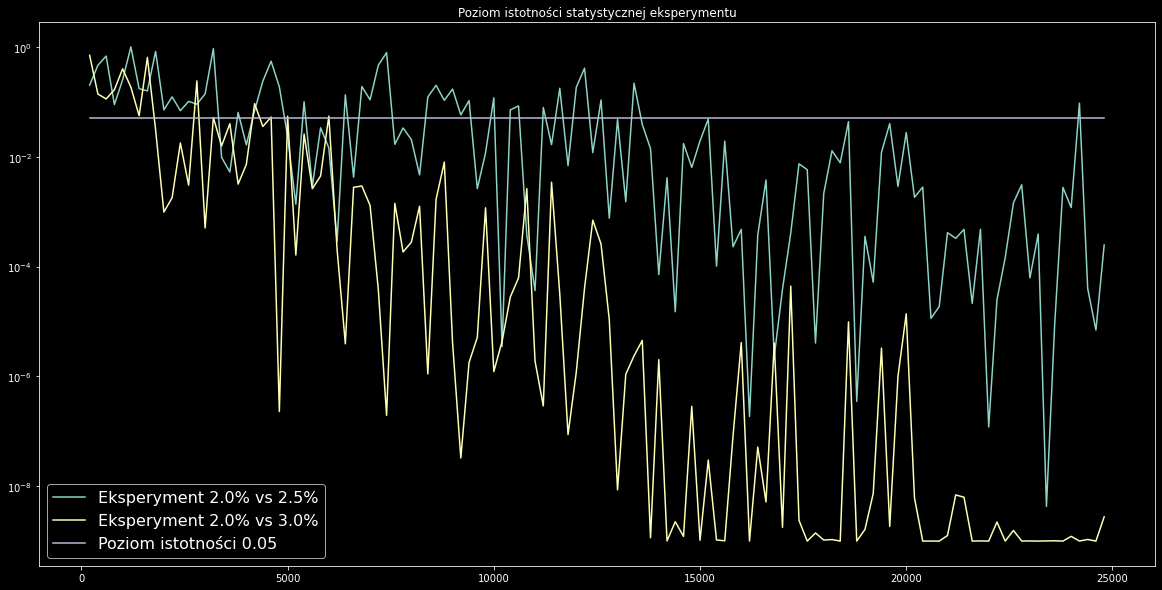

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import random

plt.style.use("dark_background")

def ab(N, delta, w1=980, w2=20):
    a = random.choices([0, 1],  weights=[w1, w2], k=N)
    b = random.choices([0, 1],  weights=[w1-delta, w2+delta], k=N)
    t, p = st.ttest_ind(a,b)
    return p+0.000000001
    

experiments = range(200, 25_000, 200)
tstats5 = [ ab(N, 5) for N in experiments]
tstats10 = [ ab(N,10) for N in experiments]
flatp5 = [ 0.05 for N in experiments ]    

fig = plt.figure();
plt.figure(figsize=(20,10));
plt.yscale("log")


plt.title('Poziom istotności statystycznej eksperymentu');
t5, = plt.plot(experiments, tstats5, label="Eksperyment 2.0% vs 2.5%");
t10, = plt.plot(experiments, tstats10, label="Eksperyment 2.0% vs 3.0%");
p5, = plt.plot(experiments, flatp5, label="Poziom istotności 0.05");
plt.legend(handles=[t5, t10, p5], frameon=True, loc="best",  fontsize=16);
plt.show();

---
# <font color='red'>__*DANGER ZONE 2*__</font>


# Poziom istotności `p` ma sens _TYLKO_ w odniesieniu do _ZAKOŃCZONEGO_ eksperymentu

# Przerwanie eksperymentu przed ustalonym a priori czasem jest nazywane 
- # `p-value fishing`
- # `p-hacking`

---
# Moja checklista do testów __A/B__

 - ### Testuj tylko jedną zmienną naraz (np. _CTR_)
 - ### Z góry ustal cel
 - ### <font color='yellow'>__Z góry ustal wielkość/granice testu__</font>
 - ### Z góry ustal poziom istotności i <font color='yellow'>NIE PRZERYWAJ WCZEŚNIEJ TESTU</font> po osiągnięciu tego poziomu
 - ### Ustal grupę kontrolną i grupę eksperymentalną
 - ### Podziel (w najprostszym przypadku) ruch na dwie części równe i <font color='yellow'>__LOSOWE__</font> 
 - ### Testuj obie grupy <font color='yellow'>__RÓWNOCZESNIE__</font>
 - ### Jeśli tylko to możliwe, testuj wiele opcji:  *A/A*, *A/A/B*, *A/A/B/C*, *A/B/C/D* 

---

## __A/A__ albo __A/A/B__ 
- ###  pozwalają sprawdzić czy system działa i stanowią dobrą podstawę do tłumaczenia się z poziomów istotności

---
# Gra w kółko i krzyżyk

In [30]:
def cell(x):
    try:
        if x.lower()=="x":
            return " X "
        if x.lower()=="o":
            return " O "
    except:
        pass
    return "   "

In [31]:
def print_state(state):
    sep = "_"*11+"\n"
    ret = []
    n=0
    for row in state:
        ret.append("|".join(map(cell,row)))
        n+=1
        if n<3:
                ret.append(sep)
    for line in ret:
        print(line)

In [32]:
state = (('x','o',0.0),
         ('o','x',0.0),
         (0.0,'o','x'))
print_state(state)

 X | O |   
___________

 O | X |   
___________

   | O | X 


In [33]:
def has_won(state):
    players = ['x', 'o']
    for i in [0,1]:
        for row in state:
            if row==tuple(players[i]*3): # _
                return i, True
        for cols in [0, 1, 2]:
            if state[0][cols]==state[1][cols] and state[2][cols]==state[0][cols] and state[0][cols]==players[i]: # |
                return i, True
        if state[0][0]==state[1][1] and state[0][0]==state[2][2] and state[0][0]==players[i]:   # \
                return i, True
        if state[2][0]==state[1][1] and state[2][0]==state[0][2] and state[0][2]==players[i]:   # /
                return i, True
            
    return -1, False

In [34]:
def is_full(state):
    for row in state:
        for v in row:
            if v!="x" and v!="o":
                return False
    return True

def is_valid_move(state, x, y):
    row = state[x]
    if row[y]!="x" and row[y]!="o":
        return True
    return False

def new_state(state, x, y, character):
    l = []
    for row in state:
        l.append(list(row))
    l[x][y] = character
    return (tuple(l[0]), tuple(l[1]), tuple(l[2]))

In [35]:
import random

class Player:
    def move(state):
        return state
    def learn(self, won):
        pass

    
class HumanPlayer(Player):
    def __init__(self, character):
        self.character=character
        
    def move(self, state):
        print_state(state)
        flag = False
        while not flag:
            print()
            x = int(input(f"({self.character}) row: "))
            y = int(input(f"({self.character}) col: "))
            flag=is_valid_move(state, x, y)
        print()
        
        return new_state(state, x, y, self.character)

    
class RandomPlayer(Player):
    def __init__(self, character):
        self.character=character
        
    def move(self, state):
        flag = False
        while not flag:
            x = random.randrange(3)
            y = random.randrange(3)
            flag=is_valid_move(state, x, y)
       
        return new_state(state, x, y, self.character)

In [36]:
def do_game(player0, player1, stats, verbose=False):
    state = ((0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0))
    ended = False
    full = False
    won_won = -1
    
    while not ended and not full:
        state = player0.move(state)
        who_won, ended = has_won(state)
        full = is_full(state)        
        if not ended and not full:
            state = player1.move(state)
            who_won, ended = has_won(state)
            full = is_full(state)
    if ended:
        stats.append("WIN 0" if who_won==0 else "WIN 1")
        player0.learn(1.0 if who_won==0 else 0.0)
        player1.learn(1.0 if who_won==1 else 0.0)
    if full and not ended:
        stats.append("DRAW")    
        player0.learn(0.5)
        player1.learn(0.5)
    if verbose:
        print("DRAW" if full and not ended else f"{who_won} has WON!")
        print()
        print_state(state)

Counter({'WIN 0': 594, 'WIN 1': 274, 'DRAW': 132})


<Figure size 432x288 with 0 Axes>

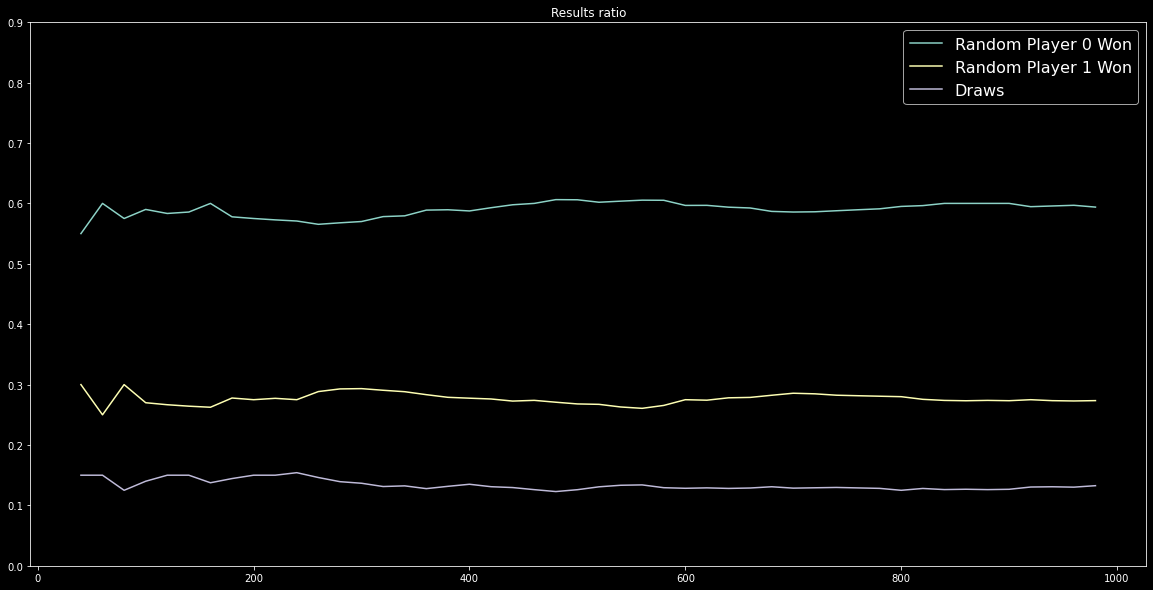

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

plt.style.use("dark_background")

stats = []

for i in range(1_000):
    do_game(RandomPlayer('x'), RandomPlayer('o'), stats, False)
    
print(Counter(stats))


def plot_games(qstats, label0, label1):
    games = range(40, len(qstats), 20)
    won0 = [ Counter(qstats[:x])['WIN 0']/x for x in games]
    won1 = [ Counter(qstats[:x])['WIN 1']/x for x in games]
    draw = [ Counter(qstats[:x])['DRAW']/x for x in games]


    fig = plt.figure();
    plt.figure(figsize=(20,10));
    plt.ylim([0.0, 0.9])
    plt.title('Results ratio');
    player0, = plt.plot(games, won0, label=label0);
    player1, = plt.plot(games, won1, label=label1);
    draws, = plt.plot(games, draw, label="Draws");
    plt.legend(handles=[player0, player1,  draws], frameon=True, loc="best",  fontsize=16);
    plt.show();

plot_games(stats, "Random Player 0 Won", "Random Player 1 Won");

---

## Nauczanie Maszynowe to:

- ### Uczenie z nadzorem (ang. *Supervised Learning*)
- ### Uczenie bez nadzoru (ang. *Unsupervised Learning*)
- ### __Uczenie ze wzmocnieniem (ang. *Reinforcement Learning*)__

---
# _*Q-Learning*_

https://en.wikipedia.org/wiki/Markov_chain

https://en.wikipedia.org/wiki/Q-learning

$
Q: S \times A \rightarrow I\!R
$
---

## W danym kroku $s$ podejmujemy akcję $a$ która maksymalizuje $Q$

---


## $Q$ Może zostać stabularyzowana (tzn. wsadzona do słownika)
## Kluczami są pary `(stan, akcja)` a wartością wynik $Q$


---
# Uczymy się $Q$ korzytając ze __*Wzoru Bellmana*__


$
Q^{new}(s_t, a_t) = Q(s_t, a_t) + \alpha \cdot ( r_t +  \gamma \cdot   \max_{a}Q(s_{t+1}, a) - Q(s_t, a_t) )
$
---
#### Upraszczając:

$
Q^{new}(s_t, a_t) = (1- \alpha) \cdot Q(s_t, a_t) + \alpha \cdot  \gamma \cdot   \max_{a}Q(s_{t+1}, a)
$
---



### $\alpha$ - Tempo uczenia się

### $\gamma$ - Degradacja wagi z odległością od bodźca

### $r_t$ - nagroda w danym stanie

---

In [38]:
α = 0.15 # Tempo uczenia się
β = 0.60 # Wartość początkowa `Q` - 'agresja'
γ = 0.99 # Degradacja wagi z odległością od bodźca 

---

In [39]:
from random import sample


class QPlayer(Player):
    def __init__(self, character):
        self.character=character
        #################################################                     
        ## stabularyzowane Q  postaci:                 ##
        ## { stan1:                                    ##   
        ##     { nowy_stan1: q1, nowy_stan2: q2, ...}, ##
        ##   stan2:                                    ##
        ##     { nowy_stan3: q3, nowy_stan4: q4, ...}, ##
        ##  ... }                                      ##
        #################################################                     
        self.q_table={}
        
        self.previous_state=None
        self.current_state=((0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0))
        
    def initialize_q_table(self, state):    
        actions = {}   
        for x in range(3):
            for y in range(3):
                if is_valid_move(state, x, y):
                    ##################################
                    ## Inicjalizacja przez β (beta) ##
                    ##################################
                    actions[
                        new_state(state, x, y, self.character)
                    ] = β
        self.q_table[state] = actions
        
        return actions
        
    def move(self, state):
        
        ##############################################################
        ## Tworzę powiązanie z ruchem drugiego gracza,              ##
        ## Aby w Q-table był ciągły łańcuch od poprzedniego ruchu   ##
        ##############################################################
        
        if self.previous_state:
            actions = self.q_table.get(self.current_state, {})
            if state not in actions.keys():
                actions[state] = β
                self.q_table[self.current_state] = actions
            
        ##############################################################
        ## Jeśli w Q-table nie ma akcji powiązanych z obecnym       ##
        ## stanem, dopisuje wszystkie możliwe akcje z wagą β (beta) ##
        ##############################################################
        actions = self.q_table.get(state)
        if not actions:
            actions = self.initialize_q_table(state)

        ##############################################################
        ## Biorę najlepsze Q dla akcji w tym stanie                 ##
        ##############################################################
        best_q = max(actions.values())
        
        ##############################################################
        ## Losuję akcję pośród tych co mają najlepsze Q             ##
        ##############################################################
        best_actions = [ action for action, q in actions.items() if q==best_q ]
 
        self.previous_state = state
        self.current_state = sample(best_actions, 1)[0]

        return self.current_state
    
    def learn(self, learned_weight):
        
        self.q_table[self.previous_state][self.current_state] = learned_weight
        self.previous_state=None
        
        for state, actions in self.q_table.items():
            for next_move, q in actions.items():
                next_move_actions = self.q_table.get(next_move)
                if next_move_actions:
                    best_next_q = max(next_move_actions.values())
                   
                    #########################
                    ##    Wzór Bellmana    ##
                    #########################
                    actions[next_move] = (1-α)*q + γ*α*best_next_q 
                    
                    self.q_table[state] = actions

In [40]:
qstats = []
qplayer = QPlayer('o')

In [41]:
from collections import Counter

for i in range(1):
    do_game(RandomPlayer('x'), qplayer, qstats, False)
    
print(Counter(qstats))


Counter({'WIN 1': 1})


In [42]:
from pprint import pprint 
pprint(qplayer.q_table)

{(('x', 0.0, 0.0), ('x', 'o', 0.0), ('o', 0.0, 0.0)): {(('x', 0.0, 'x'), ('x', 'o', 0.0), ('o', 0.0, 0.0)): 0.5991},
 (('x', 'o', 'x'), ('x', 'o', 'x'), ('o', 0.0, 0.0)): {(('x', 'o', 'x'), ('x', 'o', 'x'), ('o', 0.0, 'o')): 0.6,
                                                       (('x', 'o', 'x'), ('x', 'o', 'x'), ('o', 'o', 0.0)): 1.0},
 (('x', 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0)): {(('x', 0.0, 0.0), (0.0, 'o', 0.0), (0.0, 0.0, 0.0)): 0.6,
                                                       (('x', 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 'o', 0.0)): 0.6,
                                                       (('x', 0.0, 0.0), (0.0, 0.0, 'o'), (0.0, 0.0, 0.0)): 0.6,
                                                       (('x', 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 'o')): 0.6,
                                                       (('x', 'o', 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0)): 0.6,
                                                       (('x', 0.0, 0.0), (0.0, 0.0, 0.0), (

Counter({'WIN 1': 1216, 'WIN 0': 659, 'DRAW': 126})


<Figure size 432x288 with 0 Axes>

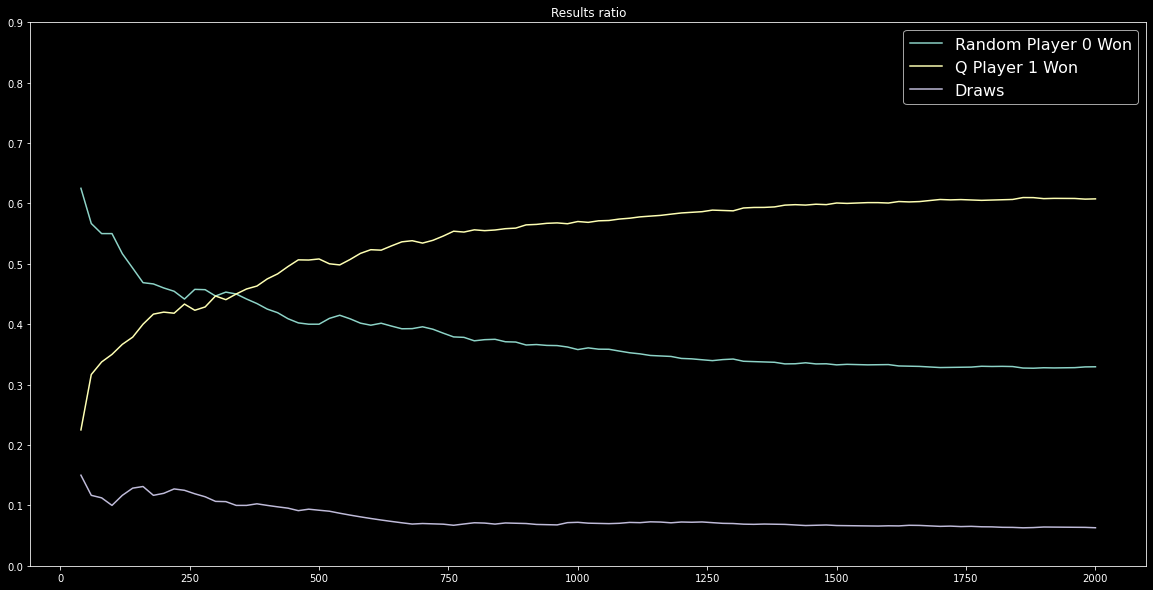

In [43]:
for i in range(2_000):
    do_game(RandomPlayer('x'), qplayer,  qstats, False)
    
print(Counter(qstats))
plot_games(qstats, "Random Player 0 Won", "Q Player 1 Won")

Counter({'WIN 1': 2497, 'WIN 0': 1269, 'DRAW': 235})


<Figure size 432x288 with 0 Axes>

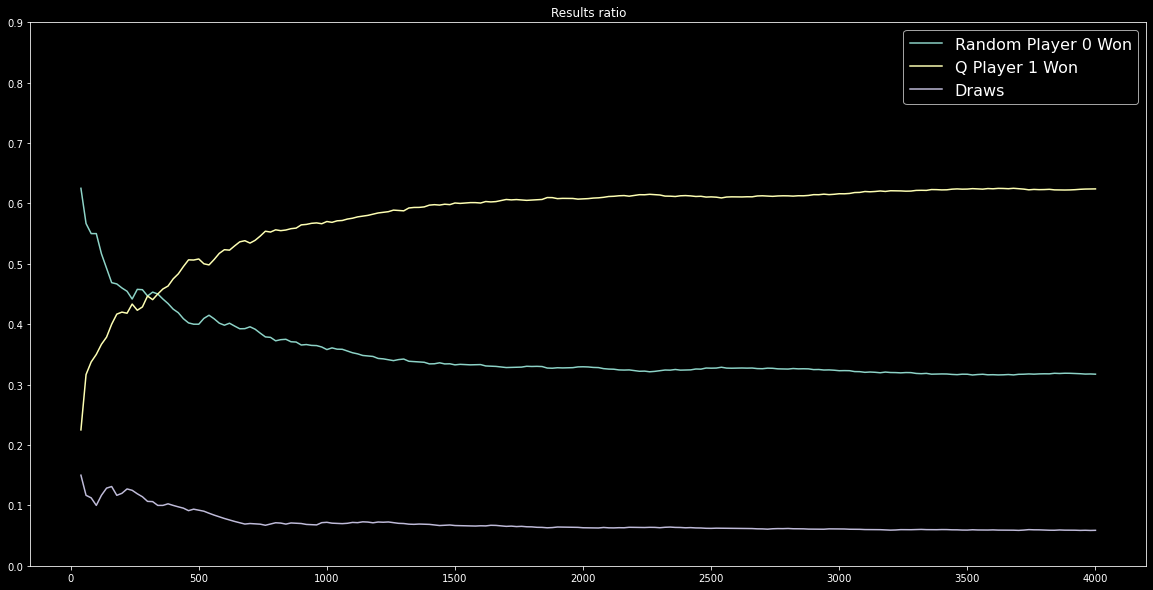

In [44]:
for i in range(2_000):
    do_game(RandomPlayer('x'), qplayer,  qstats, False)
    
print(Counter(qstats))
plot_games(qstats, "Random Player 0 Won", "Q Player 1 Won")

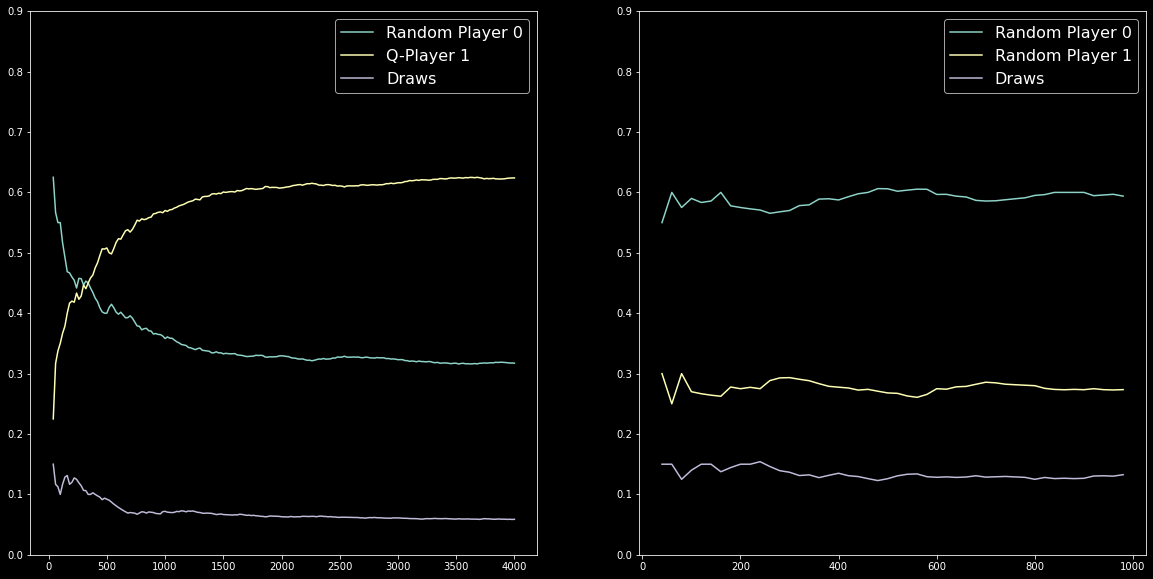

In [45]:
def plot_2_game(qstats, stats, labelA, labelB):
    qgames = range(40, len(qstats), 20)
    qwon0 = [ Counter(qstats[:x])['WIN 0']/x for x in qgames]
    qwon1 = [ Counter(qstats[:x])['WIN 1']/x for x in qgames]
    qdraw = [ Counter(qstats[:x])['DRAW']/x for x in qgames]
    games = range(40, len(stats), 20)
    won0 = [ Counter(stats[:x])['WIN 0']/x for x in games]
    won1 = [ Counter(stats[:x])['WIN 1']/x for x in games]
    draw = [ Counter(stats[:x])['DRAW']/x for x in games]


    plt.rcParams['figure.figsize'] = [20,10]
 
    fig = plt.figure();
 
    l = fig.add_subplot(121)   
    plt.ylim([0.0, 0.9])
    player0, = l.plot(qgames, qwon0, label="Random Player 0");
    player1, = l.plot(qgames, qwon1, label=labelA);
    draws, = l.plot(qgames, qdraw, label="Draws");
    l.legend(handles=[player0, player1,  draws], frameon=True, loc="best", fontsize=16);

    r = fig.add_subplot(122)  
    plt.ylim([0.0, 0.9])
    player0, = r.plot(games, won0, label="Random Player 0");
    player1, = r.plot(games, won1, label=labelB);
    draws, = r.plot(games, draw, label="Draws");
    r.legend(handles=[player0, player1,  draws], frameon=True, loc="best", fontsize=16);
    plt.show();

plot_2_game(qstats, stats, "Q-Player 1", "Random Player 1")

Counter({'WIN 1': 654, 'WIN 0': 285, 'DRAW': 61})


<Figure size 1440x720 with 0 Axes>

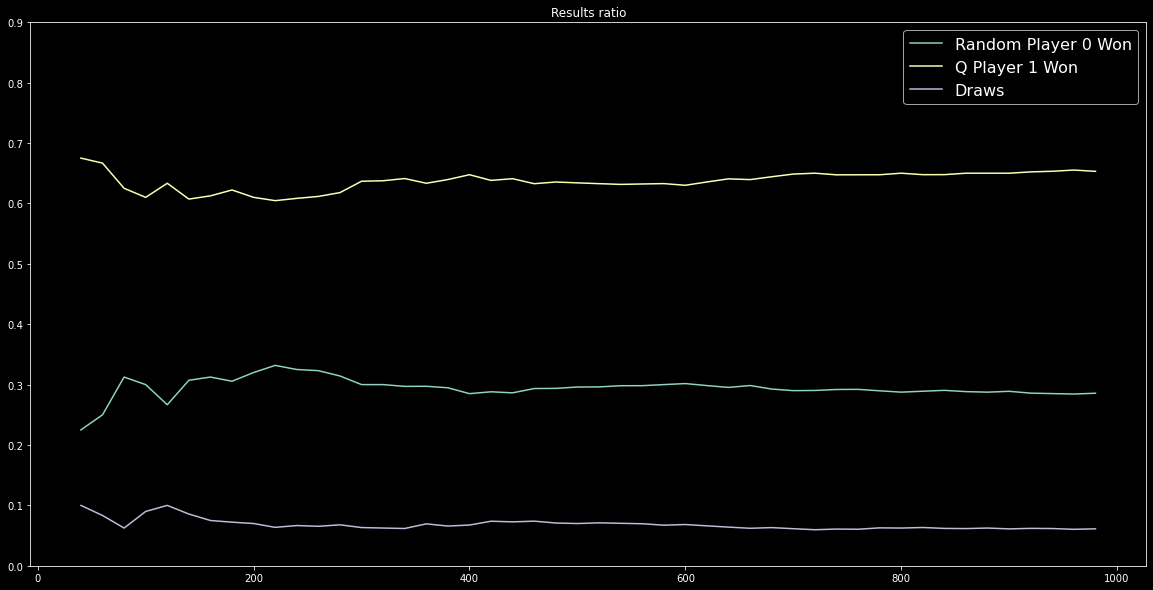

In [46]:
qstats2 = []
for i in range(1_000):
    do_game(RandomPlayer('x'), qplayer,  qstats2, False)
    
print(Counter(qstats2))
plot_games(qstats2, "Random Player 0 Won", "Q Player 1 Won")

---
## A/B Testing ma zazwyczaj dwie fazy
- ### __*Eksploracji*__ - sprawdzamy która lepsza jest lepsza
- ### __*Eksploatacji*__ - "lepsza" wersja działa jako jedyna

## Wady typowego podejścia
- ### Nie ma płynnego przejścia z 2 wersji na 1
- ### W czasie eksploracji sprawdzamy wiele dużo wersji gorszych od wersji kontrolnej
- ### __*Eksploracja w praktyce nigdy się nie kończy*__

---
# Problem Wielorękiego Bandyty

![](img\Las_Vegas_slot_machines.jpg)

https://en.wikipedia.org/wiki/Multi-armed_bandit

Mamy budżet aby jak najwięcej "ugrać". Poszczególni jednoręcy bandyci różnią się między sobą szansą na wygraną. 

Ile spędzić budzetu na eksplorację najlepszej maszyny, a ile na osiągnięcie wygranej ?

Istnieje olbrzymi katalog algorytmów (ang. __bandit algorithms__) które na to odpowiadają.
- ε-greedy
- soft-max
- soft-max z wyżarzaniem
- Upper Confidence Bound
- Exp3
- etc. etc.

![](img\banditalgos.jpg)

---
## Algorytm ε-zachłanny - ε-greedy

- #### Z prawdopodobieństwem `1-ε`  wybieramy strategię kontrolną `A` do eksploatacji. 

- #### Z prawdopodobieństwem `ε` (np. 20%) wybieramy strategię `B`  do eksploracji. 



![](img\epsilongreedy.png)

---
## Algorytm Soft-max

#### $r_A$ - proporcja sukcesów w gałęzi `A`

#### $r_B$ - proporcja sukcesów w gałęzi `B`

<br>

- #### Z prawdopodobieństwem $$\frac{r_A}{r_A+r_B}$$ wybieramy strategię kontrolną `A` do eksploatacji. 

- #### Z prawdopodobieństwem $$\frac{r_B}{r_A+r_B}$$ wybieramy strategię `B`  do eksploracji. 

---
## Algorytm Soft-max z wyżarzaniem

#### $r_A$ - proporcja sukcesów w gałęzi `A`

#### $r_B$ - proporcja sukcesów w gałęzi `B`

#### $\tau$ - "temperatura"

<br>

- #### Z prawdopodobieństwem $$\frac{exp(r_A/\tau)}{exp(r_A/\tau)+exp(r_B/\tau)}$$ wybieramy strategię kontrolną `A` do eksploatacji. 

- #### Z prawdopodobieństwem $$\frac{exp(r_B/\tau)}{exp(r_A/\tau)+exp(r_B/\tau)}$$ wybieramy strategię `B`  do eksploracji. 

---
`t = sum(self.counts) + 1`

`tau = 1 / math.log(t + 0.0000001)`


---
## __*Wyżarzanie*__

### __*Wyżarzanie*__ - to obniżanie "temperatury" czyli zmienności układu z czasem

### Dzięki __*wyżarzaniu*__ - system z czasem coraz rzadziej eksploruje.

#### __*Hartowanie*__ to zwiększanie temperatury raz na jakiś czas aby "wybić" system z minimów lokalnych 


---
## Q-Player z __*Wyżarzaniem*__

Zmniejszamy `α` przez mnożenie przez `γ` co krok - przez co spada zmienność układu

In [47]:
α = 0.99  # Tempo uczenia się - "temperatura"
β = 0.80  # Wartość początkowa `Q` - 'agresja'
γ = 0.975 # Degradacja wagi z odległością od bodźca oraz tempo spadku "temperatury"

class AnnealingQPlayer(QPlayer):
    def __init__(self, character):
        super().__init__(character)
        
    def learn(self, learned_weight):
        global α
        
        ################
        ## Wyżarzanie ##
        ################
        α *= γ
        
        super().learn(learned_weight)


In [48]:
annealing_qplayer = AnnealingQPlayer('o')

Counter({'WIN 1': 1175, 'WIN 0': 590, 'DRAW': 235})


<Figure size 1440x720 with 0 Axes>

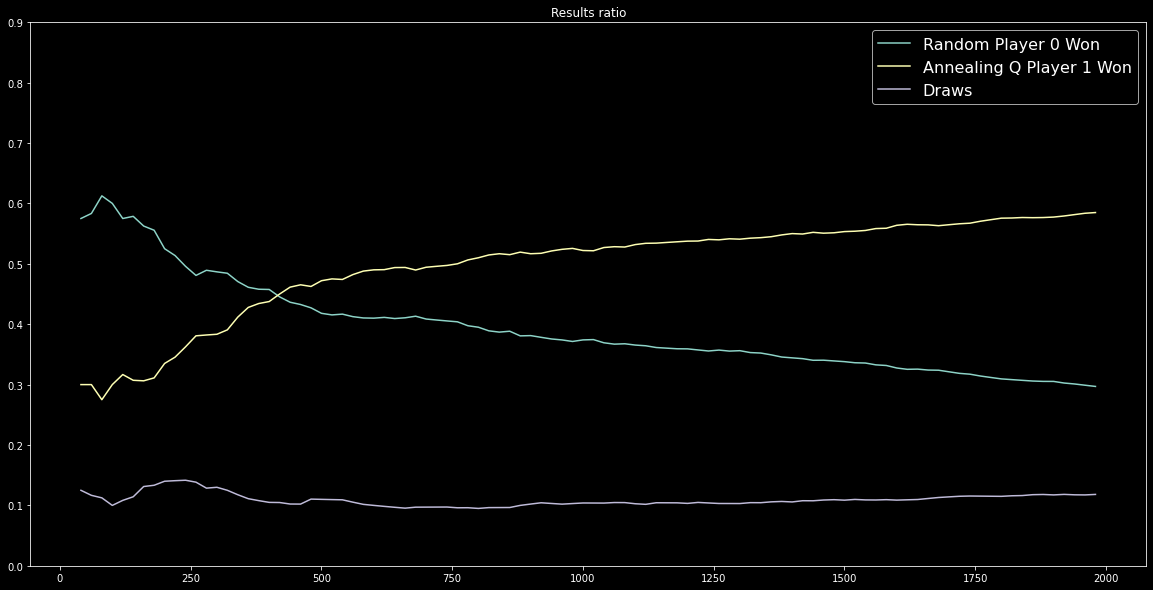

In [49]:
aqstats = []
for i in range(2_000):
    do_game(RandomPlayer('x'), annealing_qplayer,  aqstats, False)
    
print(Counter(aqstats))
plot_games(aqstats, "Random Player 0 Won", "Annealing Q Player 1 Won")

Counter({'WIN 1': 2572, 'WIN 0': 872, 'DRAW': 556})


<Figure size 1440x720 with 0 Axes>

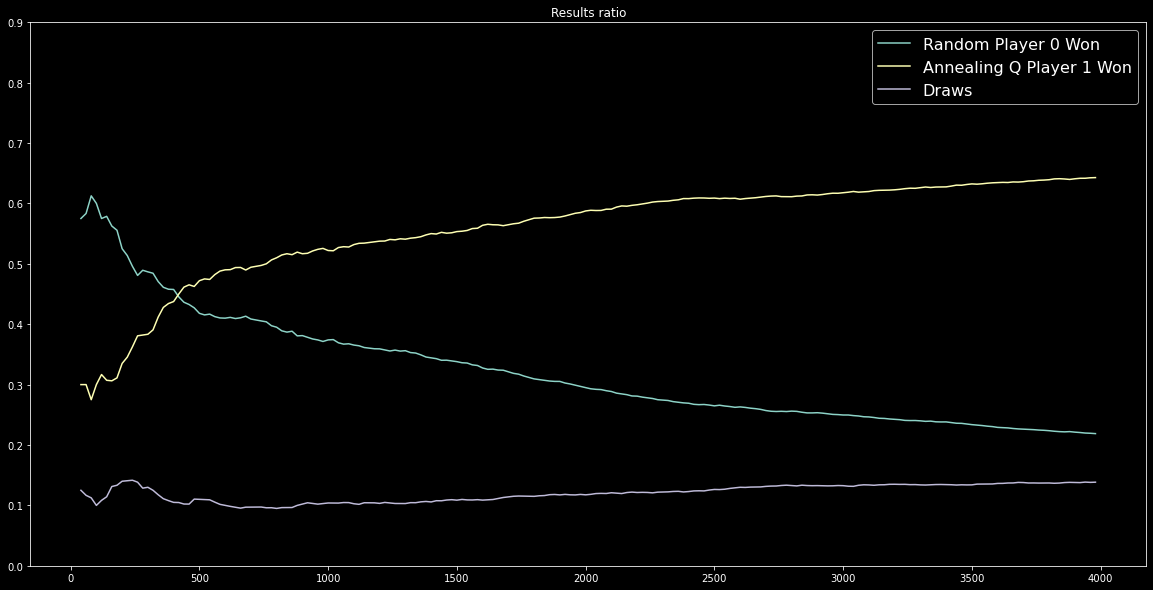

In [50]:
for i in range(2_000):
    do_game(RandomPlayer('x'), annealing_qplayer,  aqstats, False)
    
print(Counter(aqstats))
plot_games(aqstats, "Random Player 0 Won", "Annealing Q Player 1 Won")

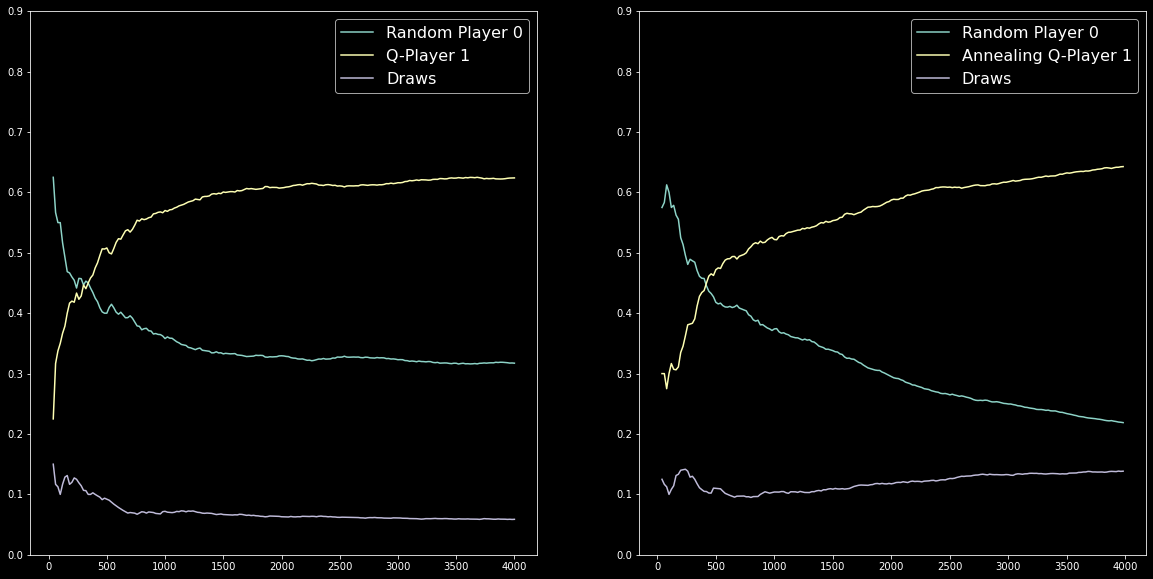

In [51]:
plot_2_game(qstats, aqstats, "Q-Player 1", "Annealing Q-Player 1")

Counter({'WIN 1': 701, 'DRAW': 201, 'WIN 0': 98})


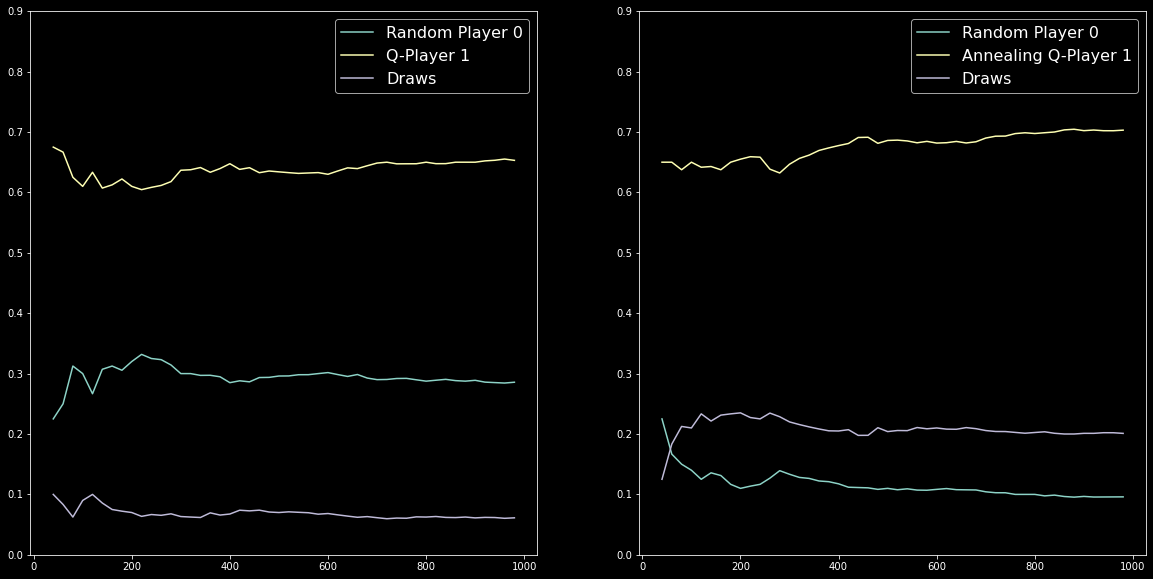

In [52]:
aqstats2 = []
for i in range(1_000):
    do_game(RandomPlayer('x'), annealing_qplayer,  aqstats2, False)
    
print(Counter(aqstats2))


plot_2_game(qstats2, aqstats2, "Q-Player 1", "Annealing Q-Player 1")

---
# Materiały

- *p-Hacking and False Discovery in A/B Testing* - Ron Berman, Leonid Pekelisy, Aisling Scottz, Christophe Van den Bultex. December 11, 2018

https://www.msi.org/working-papers/phacking-and-false-discovery-in-a-b-testing-2/

- https://en.wikipedia.org/wiki/Q-learning

- https://www.twitch.tv/michal_korzycki
---

In [ ]:
do_game(HumanPlayer('x'), annealing_qplayer, [], True)